In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Reading the files
plant_1_df = pd.read_csv('Plant_1_Generation_Data.csv')
plant_2_df = pd.read_csv('Plant_2_Generation_Data.csv')
solar_recording_df = pd.read_csv('SolarRecording.csv')

C:\Users\Crystal\AppData\Local\Temp\ipykernel_13436\1787468593.py:10: DtypeWarning: Columns (2,3,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  solar_recording_df = pd.read_csv('SolarRecording.csv')


In [2]:
from datetime import datetime

# Preprocessing the plant generation data by formatting the 'DATE_TIME' column
plant_1_df['DATE_TIME'] = pd.to_datetime(plant_1_df['DATE_TIME'], dayfirst=True)
plant_2_df['DATE_TIME'] = pd.to_datetime(plant_2_df['DATE_TIME'], dayfirst=True)
solar_recording_df['DATE_TIME'] = pd.to_datetime(solar_recording_df['Date'] + ' ' + solar_recording_df['Time'])

C:\Users\Crystal\AppData\Local\Temp\ipykernel_13436\4273201748.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar_recording_df['DATE_TIME'] = pd.to_datetime(solar_recording_df['Date'] + ' ' + solar_recording_df['Time'])


In [34]:
#
plant_1_df['SOURCE_KEY'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [35]:
plant1_sortbycell = plant_1_df.groupby('SOURCE_KEY').agg({'DC_POWER': 'mean', 'AC_POWER': 'mean',
                                                               'DAILY_YIELD': 'mean', 'TOTAL_YIELD': 'mean'}).reset_index()

plant1_sortbycell.to_excel('avgpowerpercell.xlsx', sheet_name='Sheet1', index=False)
plant1_sortbycell.head(5)

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1BY6WEcLGh8j5v7,2873.720981,281.124073,3230.658151,6.377464e+06
1,1IF53ai7Xc0U56Y,3226.336768,315.488026,3356.882104,6.313086e+06
2,3PZuoBAID5Wc2HD,3221.015673,314.967354,3356.856357,7.117013e+06
3,7JYdWkrLSPkdwr4,3132.891955,306.385671,3325.810327,7.728914e+06
4,McdE0feGgRqW7Ca,3211.307245,314.046321,3321.935705,7.287580e+06


In [19]:
plant1_avgpowerpercell = plant_1_df.groupby('DATE_TIME').agg({'DC_POWER': 'mean', 'AC_POWER': 'mean',
                                                               'DAILY_YIELD': 'mean', 'TOTAL_YIELD': 'mean'}).reset_index()
plant1_avgpowerpercell.head(5)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1/6/2020 0:00,0.000000,0.000000,245.784091,6.978158e+06
1,1/6/2020 0:15,0.000000,0.000000,0.000000,6.978158e+06
2,1/6/2020 0:30,0.000000,0.000000,0.000000,6.978158e+06
3,1/6/2020 0:45,0.000000,0.000000,0.000000,6.978158e+06
4,1/6/2020 10:00,7754.196429,758.716883,1773.387987,6.979932e+06


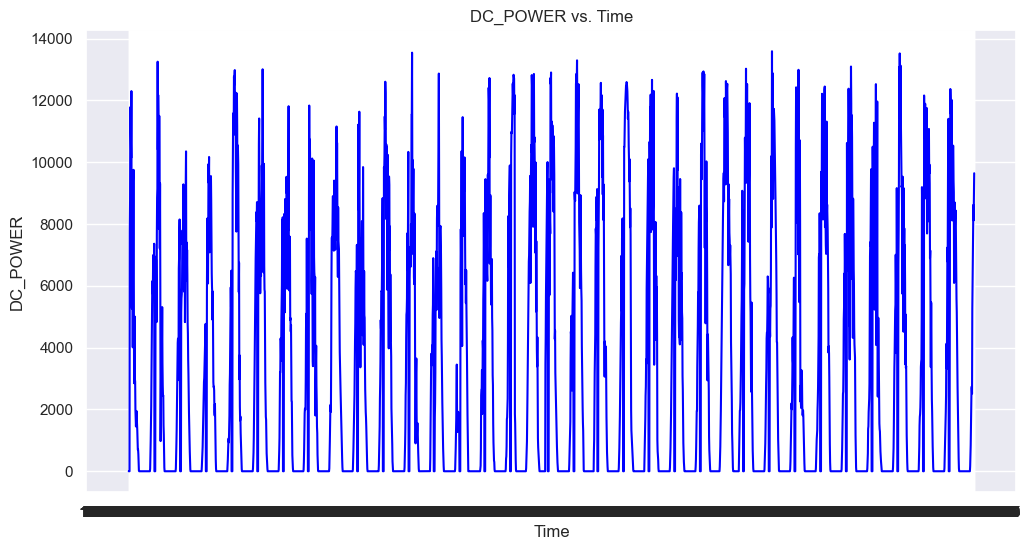

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(plant1_avgpowerpercell['DATE_TIME'], plant1_avgpowerpercell['DC_POWER'],  color = 'blue')

plt.title('DC_POWER vs. Time')
plt.xlabel('Time')
plt.ylabel('DC_POWER')
plt.grid(True)
plt.show()

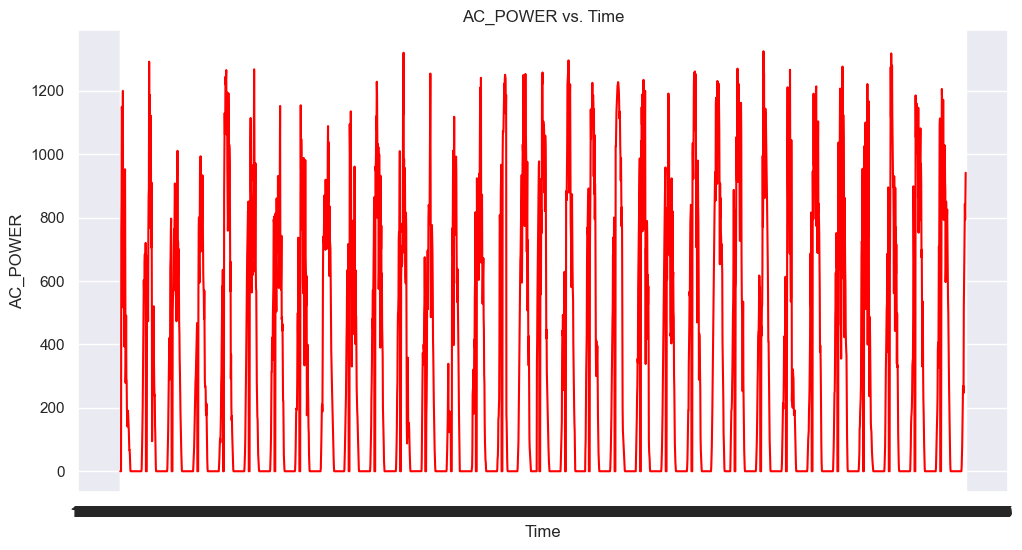

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(plant1_avgpowerpercell['DATE_TIME'], plant1_avgpowerpercell['AC_POWER'],  color = 'red')

plt.title('AC_POWER vs. Time')
plt.xlabel('Time')
plt.ylabel('AC_POWER')
plt.grid(True)
plt.show()

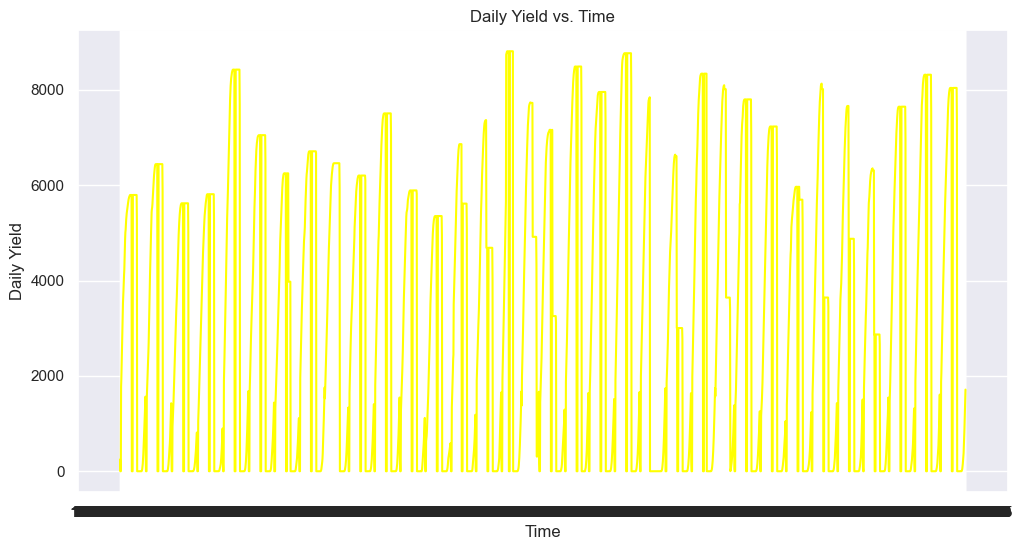

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(plant1_avgpowerpercell['DATE_TIME'], plant1_avgpowerpercell['DAILY_YIELD'],  color = 'yellow')

plt.title('Daily Yield vs. Time')
plt.xlabel('Time')
plt.ylabel('Daily Yield')
plt.grid(True)
plt.show()

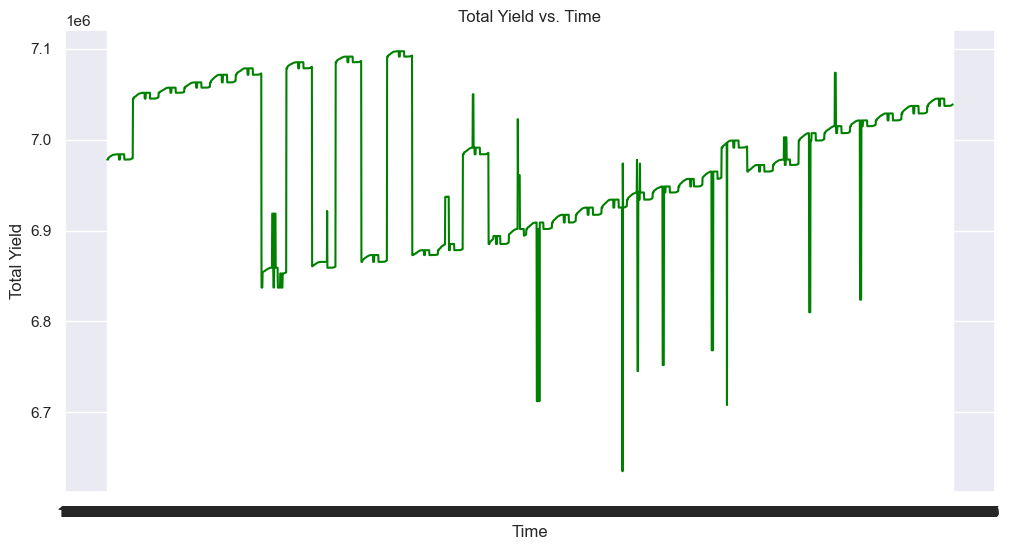

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(plant1_avgpowerpercell['DATE_TIME'], plant1_avgpowerpercell['TOTAL_YIELD'],  color = 'green')

plt.title('Total Yield vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Yield')
plt.grid(True)
plt.show()

In [36]:
solar_recording_df['DATE_TIME'] = pd.to_datetime(solar_recording_df['Date'] + ' ' + solar_recording_df['Time'])
solar_recording_df.head()

C:\Users\Crystal\AppData\Local\Temp\ipykernel_13436\1330231227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar_recording_df['DATE_TIME'] = pd.to_datetime(solar_recording_df['Date'] + ' ' + solar_recording_df['Time'])


,Unnamed: 0,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Unnamed: 12,Unnamed: 13,DATE_TIME
0,0.0,1.475229e+09,12/6/20,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,6:13:00,18:13:00,NaN,NaN,2020-12-06 23:55:26
1,1.0,1.475229e+09,12/6/20,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,6:13:00,18:13:00,NaN,NaN,2020-12-06 23:50:23
2,2.0,1.475229e+09,12/6/20,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,6:13:00,18:13:00,NaN,NaN,2020-12-06 23:45:26
3,3.0,1.475228e+09,12/6/20,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,6:13:00,18:13:00,NaN,NaN,2020-12-06 23:40:21
4,4.0,1.475228e+09,12/6/20,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,6:13:00,18:13:00,NaN,NaN,2020-12-06 23:35:24


In [39]:
solar_recording_agg = solar_recording_df.groupby('Date').agg({'Radiation': 'mean', 'Temperature': 'mean', 'Pressure': 'mean',
                                                               'Humidity': 'mean', 'WindDirection(Degrees)': 'mean', 'Speed': 'mean'}).reset_index()
solar_recording_agg

,Date,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1/6/20,265.980618,54.829091,30.450873,81.501818,121.745564,5.082691
1,1/7/20,238.781285,53.822917,30.433368,95.062500,117.546250,5.825660
2,1/8/20,216.231910,50.937500,30.423403,60.302083,131.640729,7.063681
3,1/9/20,122.109476,50.496503,30.506329,86.618881,148.102902,5.783811
4,10/6/20,220.851210,53.395018,30.384484,82.718861,120.461459,4.785836
...,...,...,...,...,...,...,...
113,9/13/2020,144.288542,46.250000,30.312604,83.302083,265.131424,7.431042
114,9/6/20,263.807529,51.155894,30.417300,71.121673,124.712966,6.931635
115,9/7/20,283.642927,52.250871,30.419059,58.101045,124.496794,6.288990
116,9/8/20,231.416944,48.291667,30.447917,62.055556,119.581389,8.657674


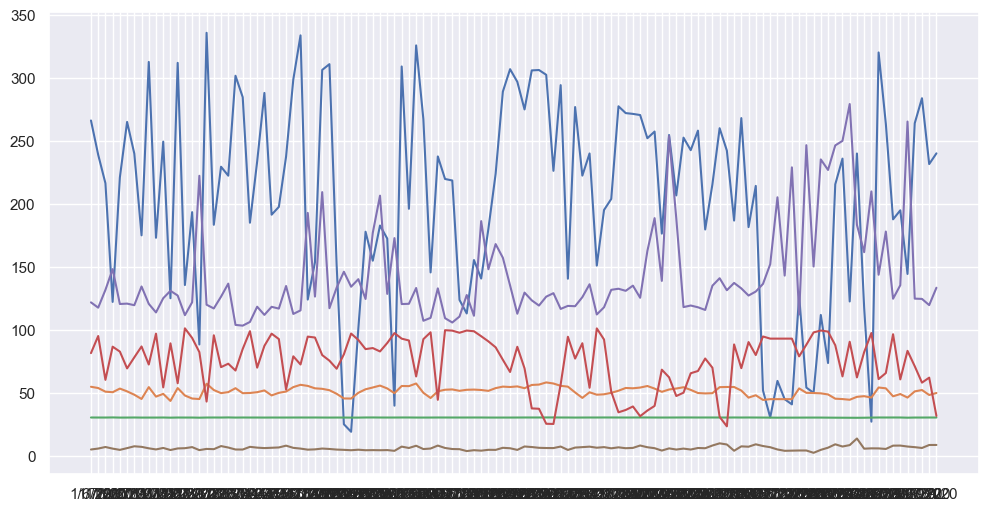

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(solar_recording_agg['Date'], solar_recording_agg[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']])

#plt.title('Total Yield vs. Time')
#plt.xlabel('Time')
#plt.ylabel('Total Yield')
#plt.grid(True)
plt.show()

C:\Users\Crystal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


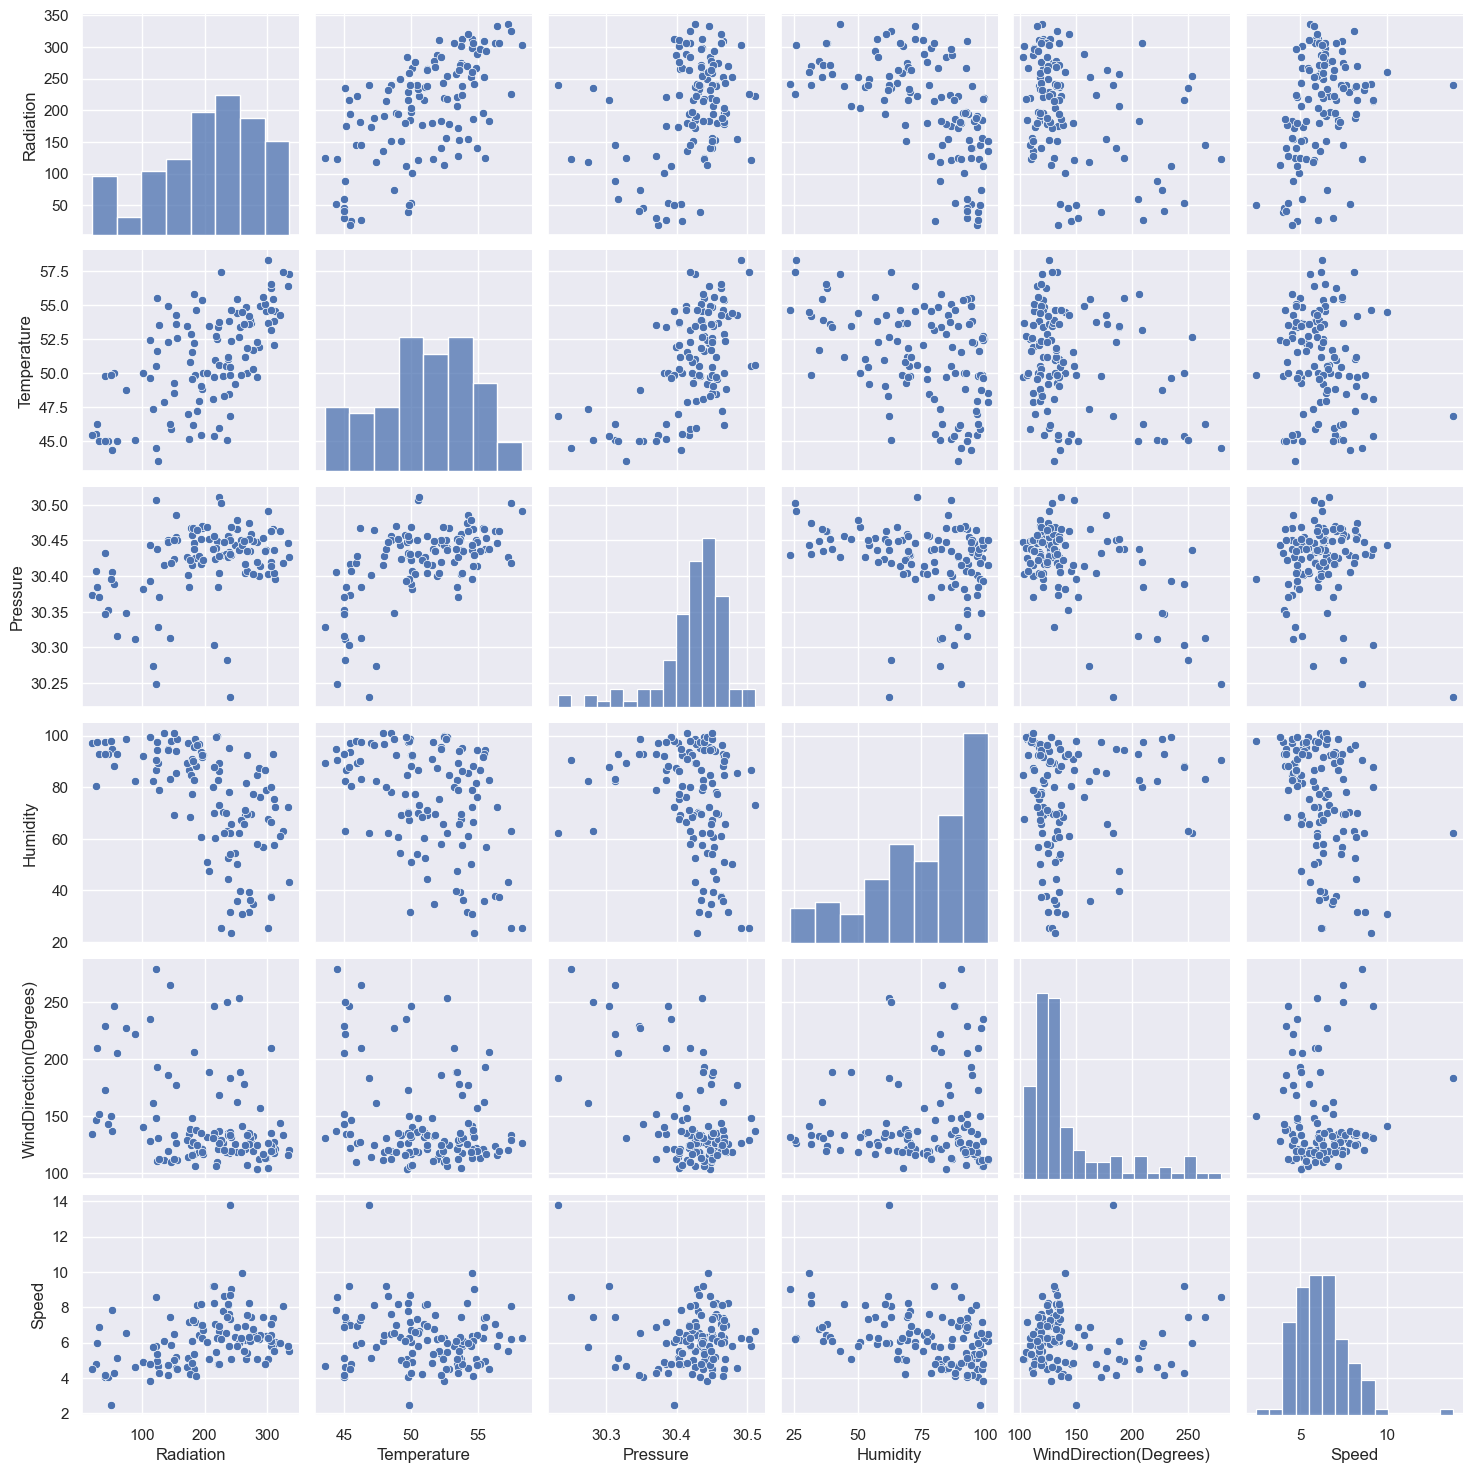

In [43]:
sb.pairplot(data = solar_recording_agg)